In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar

In [3]:
df=pd.read_csv('Datacleaned.csv')
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130,2130,2023-05-26,2023,May
1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125,2125,2023-05-25,2023,May
2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130,2125,2023-05-24,2023,May
3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130,2125,2023-05-23,2023,May
4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130,2125,2023-05-22,2023,May


In [4]:
df['District Name'].unique()

array(['Fazilka', 'Jalandhar', 'Moga', 'Sangrur', 'Fatehgarh', 'Amritsar',
       'Nawanshahr', 'Mohali', 'Mansa', 'Muktsar', 'Barnala', 'Patiala',
       'Bhatinda', 'kapurthala', 'Tarntaran', 'Hoshiarpur', 'Gurdaspur',
       'Faridkot', 'Ferozpur', 'Ludhiana', 'Ropar (Rupnagar)'],
      dtype=object)

In [5]:
df=df[df['District Name'].isin(['Nawanshahr', 'Patiala', 'Ropar (Rupnagar)', 'Sangrur'])]
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
250,Sangrur,Amargarh,Other,Cereals,1000.0,2125.0,2125,2125,2023-05-30,2023,May
251,Sangrur,Amargarh,Other,Cereals,750.0,2125.0,2125,2125,2023-05-29,2023,May
252,Sangrur,Amargarh,Other,Cereals,900.0,2125.0,2125,2125,2023-05-28,2023,May
253,Sangrur,Amargarh,Other,Cereals,11000.0,2125.0,2125,2125,2023-05-18,2023,May
254,Sangrur,Amargarh,Other,Cereals,13600.0,2125.0,2125,2125,2023-05-17,2023,May


In [39]:
class Visualization:

    def __init__(self, df):
        self.df=df


    def line_plot_district_wise(self, district, target, years):
        plt.figure(figsize=(10, 6))
        months = [m for m in calendar.month_name if m]
        
        for year in years:
            df = self.df[(self.df['District Name'] == district) & (self.df['Year'] == year)]
            targ_list = []
            for month in months:
                df2 = df[df['Month'] == month]
                targ_list.append(df2[target].sum())
            plt.plot(months, targ_list, marker='o', linestyle='-', label=year)
        
        plt.title(f"{target} Trend in {district} District")
        plt.xlabel("Month")
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def bar_plot_with_market_and_price(self, target, years, district = None):
        if district:
            df=self.df[self.df['District Name']==district]
        else:
            df=self.df
        plt.figure(figsize=(12,8))
        for year in years:
            df2 = df[df['Year']==year]
            group=df2.groupby('Market Name')[target].median()
            plt.bar(group.index, group.values, label=str(year))
        
        plt.xticks(rotation=75)
        plt.xlabel("Market Name")
        plt.ylabel(target)
        plt.legend()
        plt.show()
        

vc=Visualization(df)

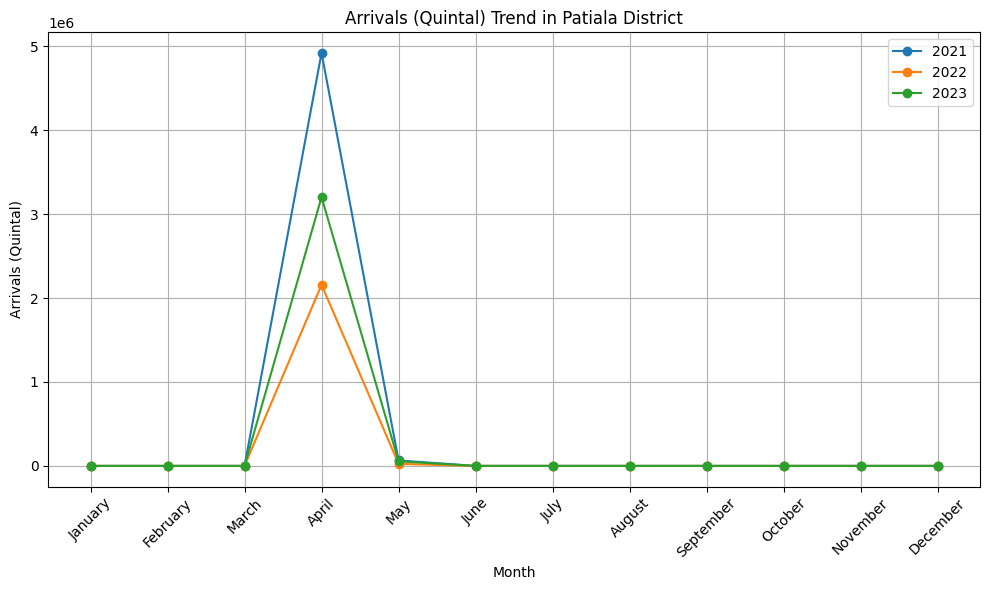

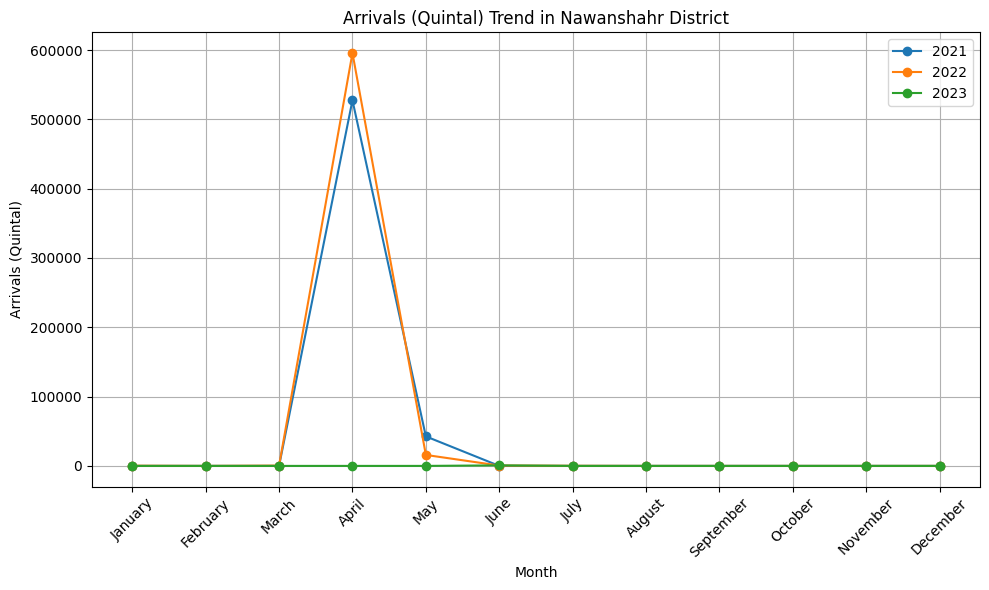

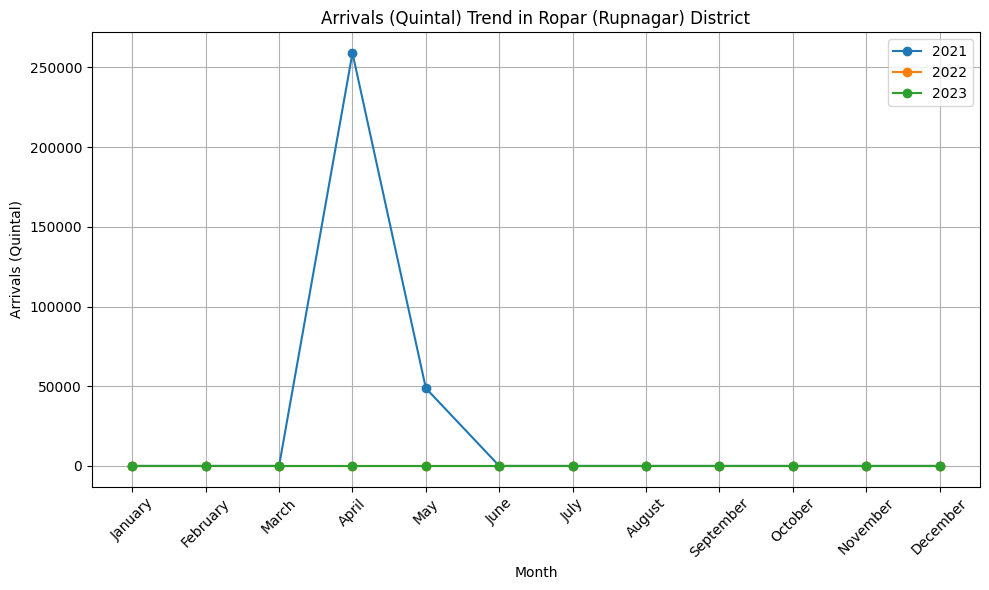

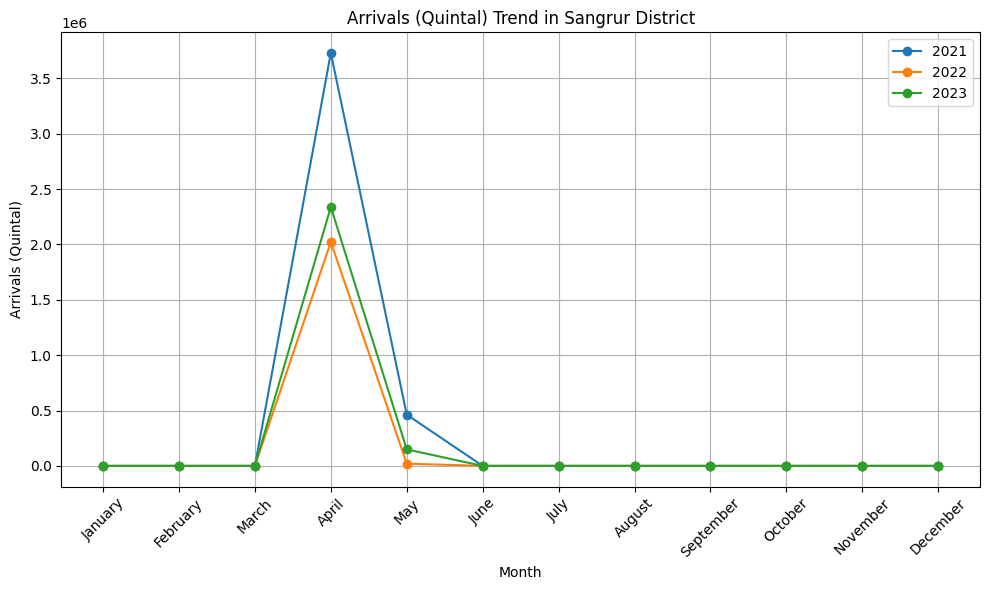

In [8]:
vc.line_plot_district_wise('Patiala', 'Arrivals (Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Nawanshahr', 'Arrivals (Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Ropar (Rupnagar)', 'Arrivals (Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Sangrur', 'Arrivals (Quintal)', [2021,2022,2023])

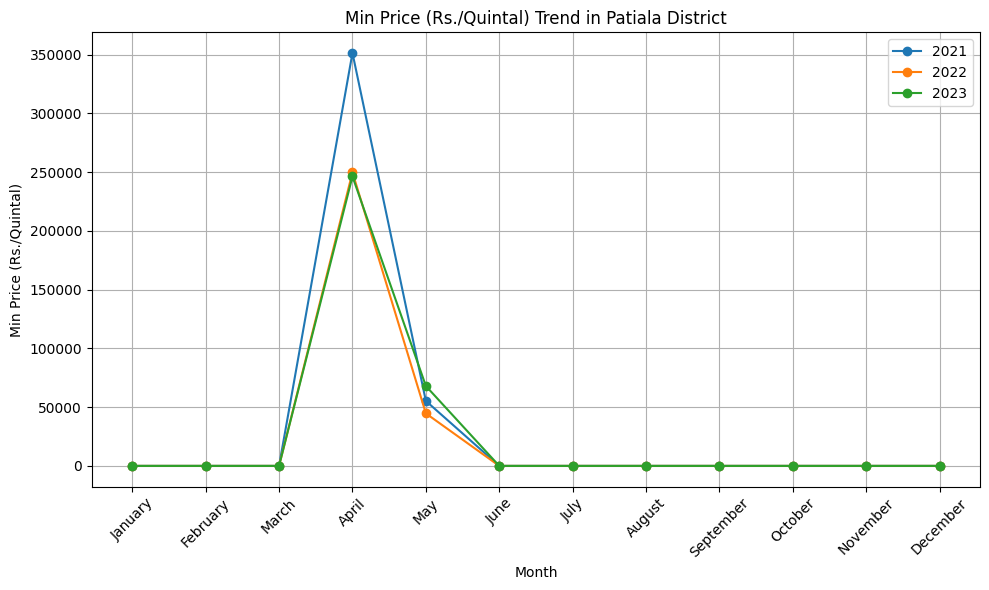

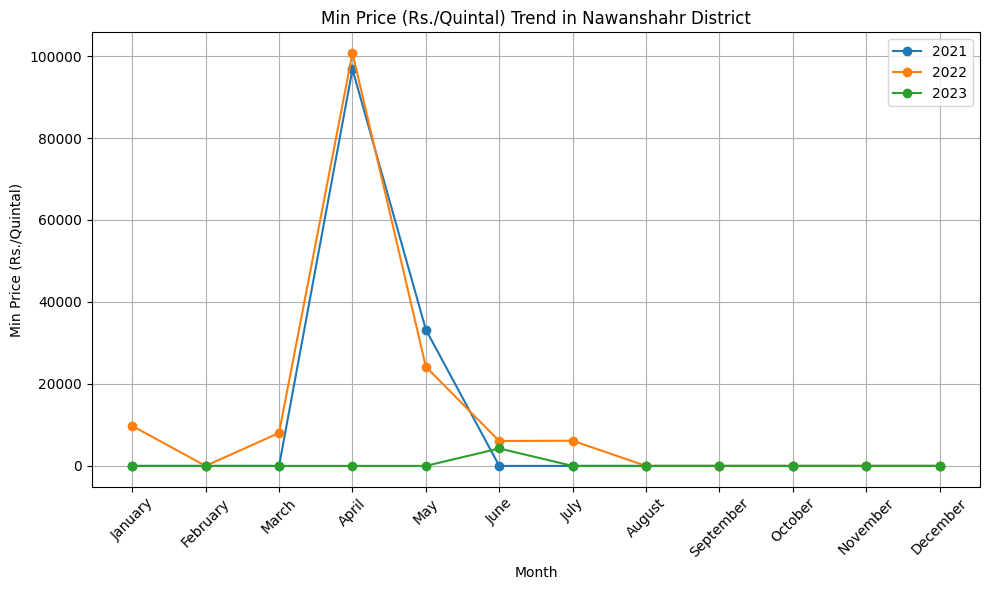

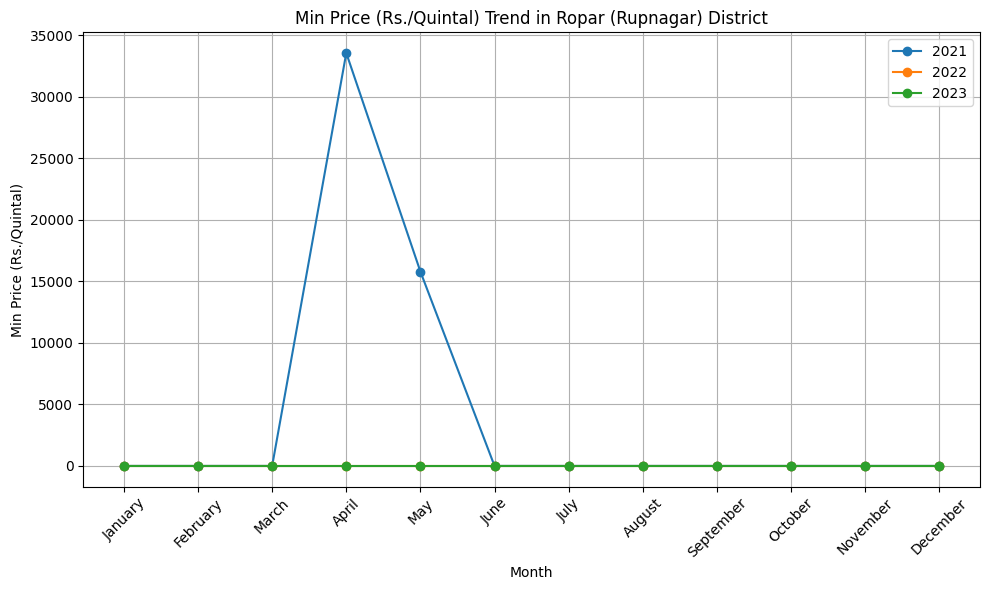

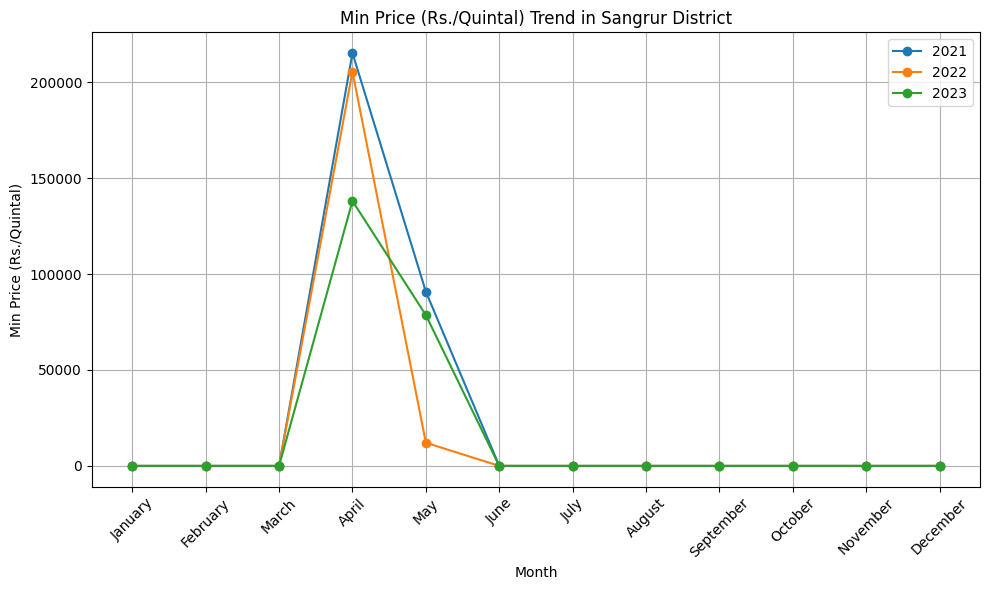

In [9]:
vc.line_plot_district_wise('Patiala', 'Min Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Nawanshahr', 'Min Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Ropar (Rupnagar)', 'Min Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Sangrur', 'Min Price (Rs./Quintal)', [2021,2022,2023])

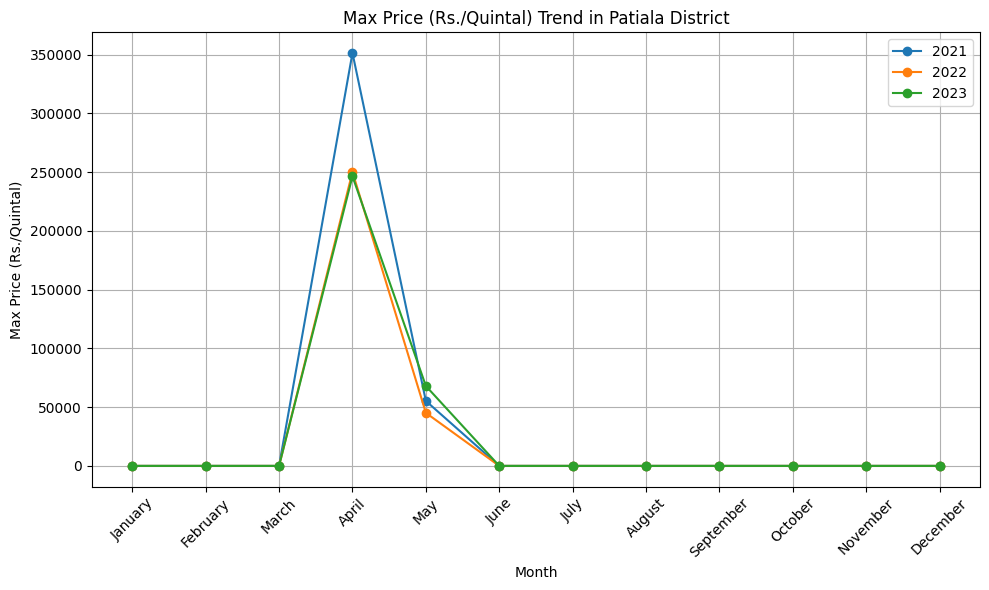

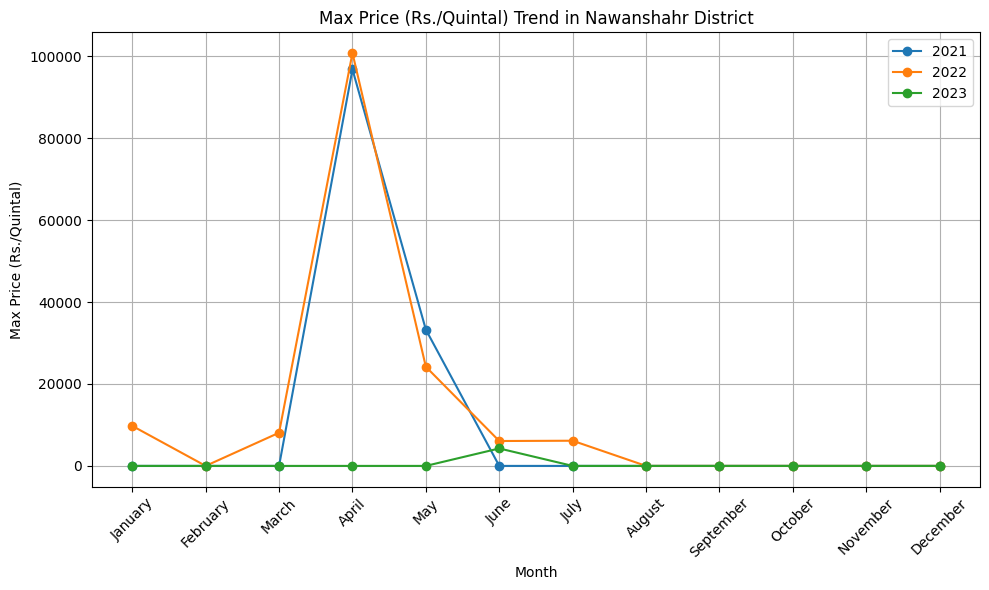

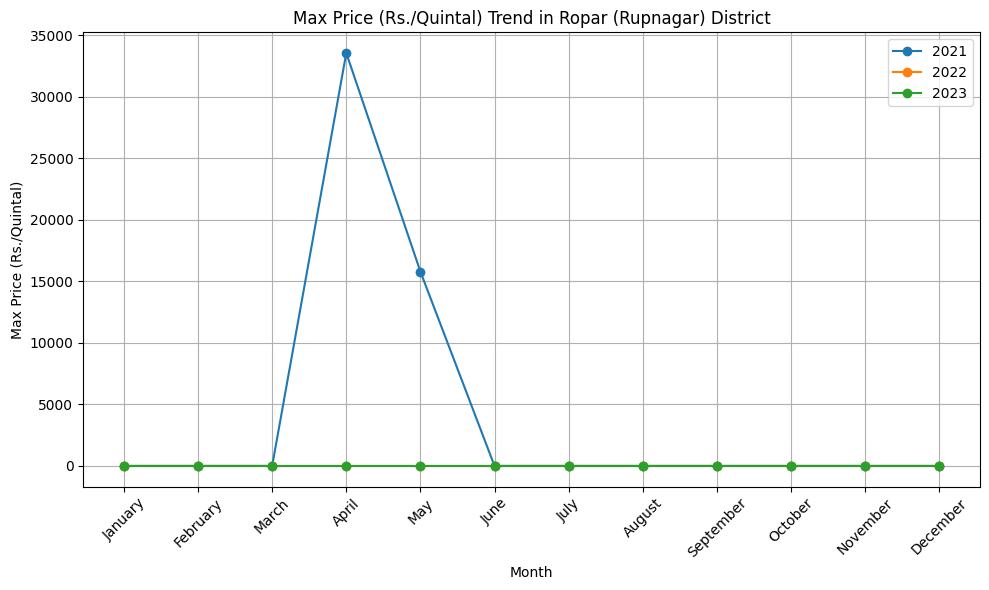

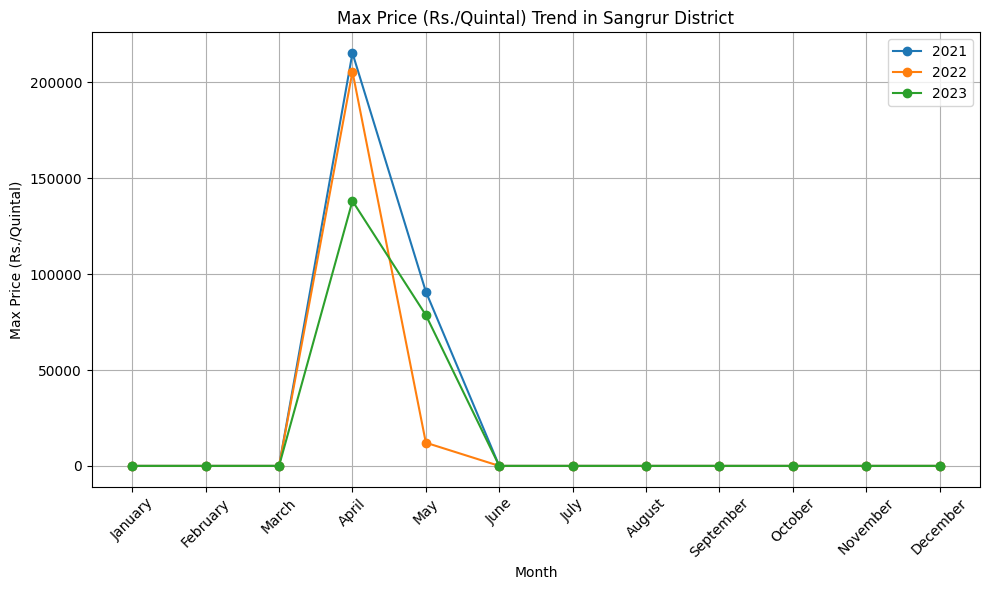

In [10]:
vc.line_plot_district_wise('Patiala', 'Max Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Nawanshahr', 'Max Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Ropar (Rupnagar)', 'Max Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Sangrur', 'Max Price (Rs./Quintal)', [2021,2022,2023])

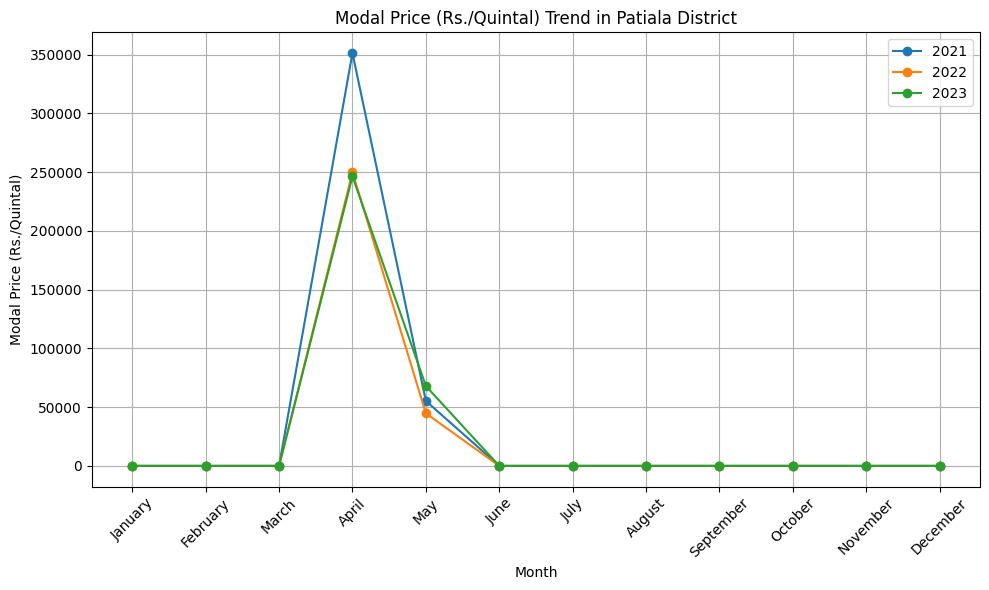

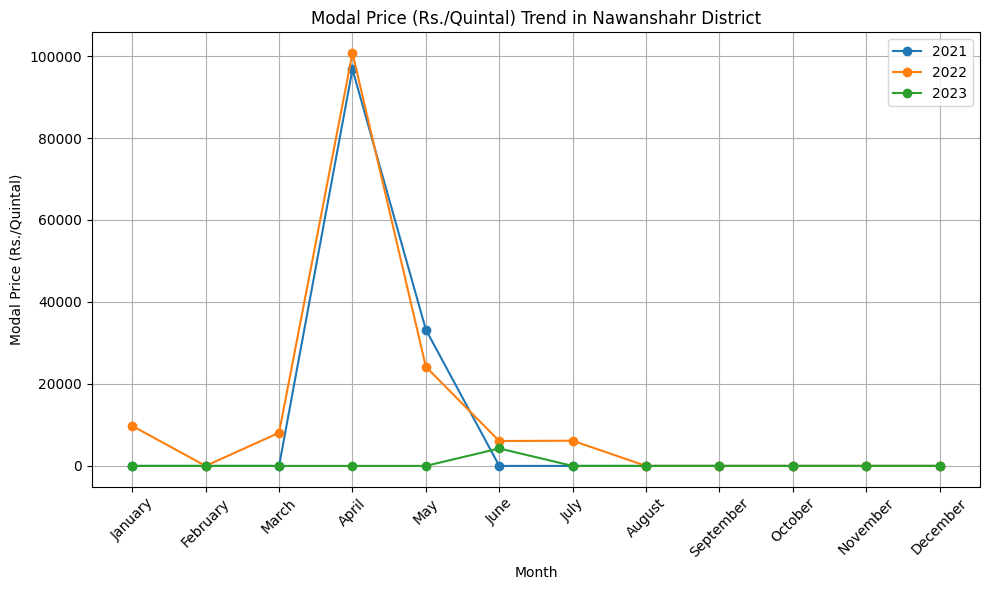

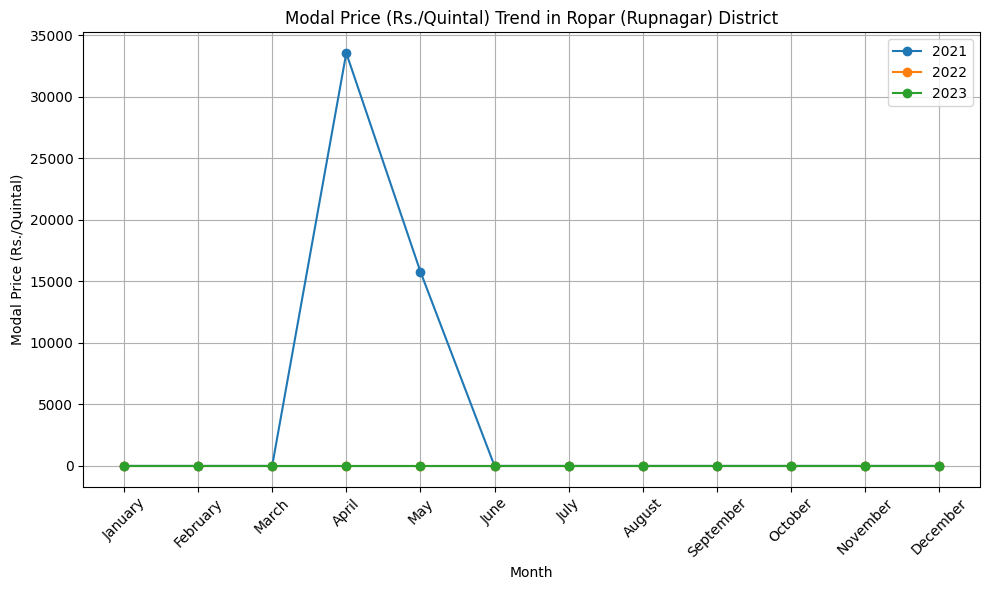

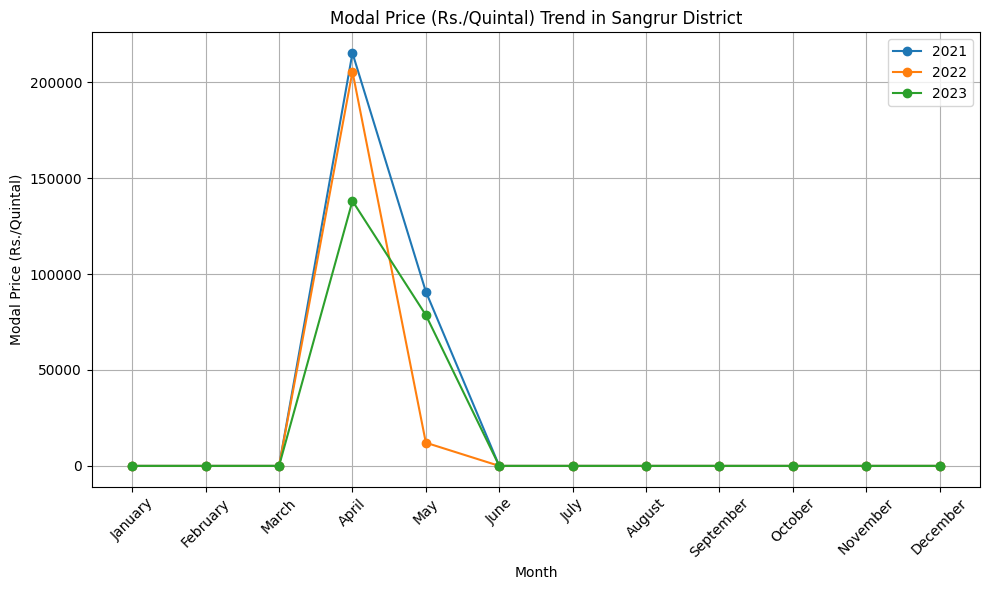

In [11]:
vc.line_plot_district_wise('Patiala', 'Modal Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Nawanshahr', 'Modal Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Ropar (Rupnagar)', 'Modal Price (Rs./Quintal)', [2021,2022,2023])
vc.line_plot_district_wise('Sangrur', 'Modal Price (Rs./Quintal)', [2021,2022,2023])

In [12]:
df.head()

,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
250,Sangrur,Amargarh,Other,Cereals,1000.0,2125.0,2125,2125,2023-05-30,2023,May
251,Sangrur,Amargarh,Other,Cereals,750.0,2125.0,2125,2125,2023-05-29,2023,May
252,Sangrur,Amargarh,Other,Cereals,900.0,2125.0,2125,2125,2023-05-28,2023,May
253,Sangrur,Amargarh,Other,Cereals,11000.0,2125.0,2125,2125,2023-05-18,2023,May
254,Sangrur,Amargarh,Other,Cereals,13600.0,2125.0,2125,2125,2023-05-17,2023,May


In [55]:
df['Variety'].unique()

array(['Other', '147 Average', 'Local', 'Medium', 'Hybrid', 'Super Fine'],
      dtype=object)

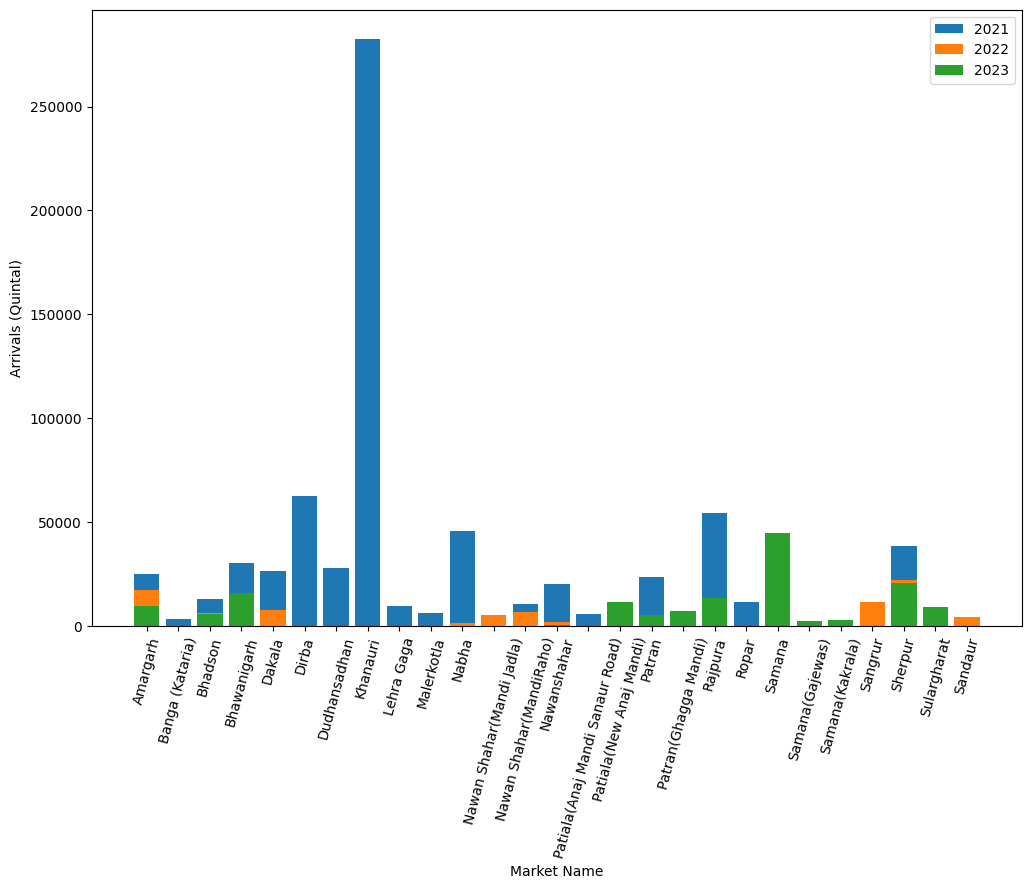

In [53]:
vc.bar_plot_with_market_and_price('Arrivals (Quintal)', [2021, 2022, 2023])

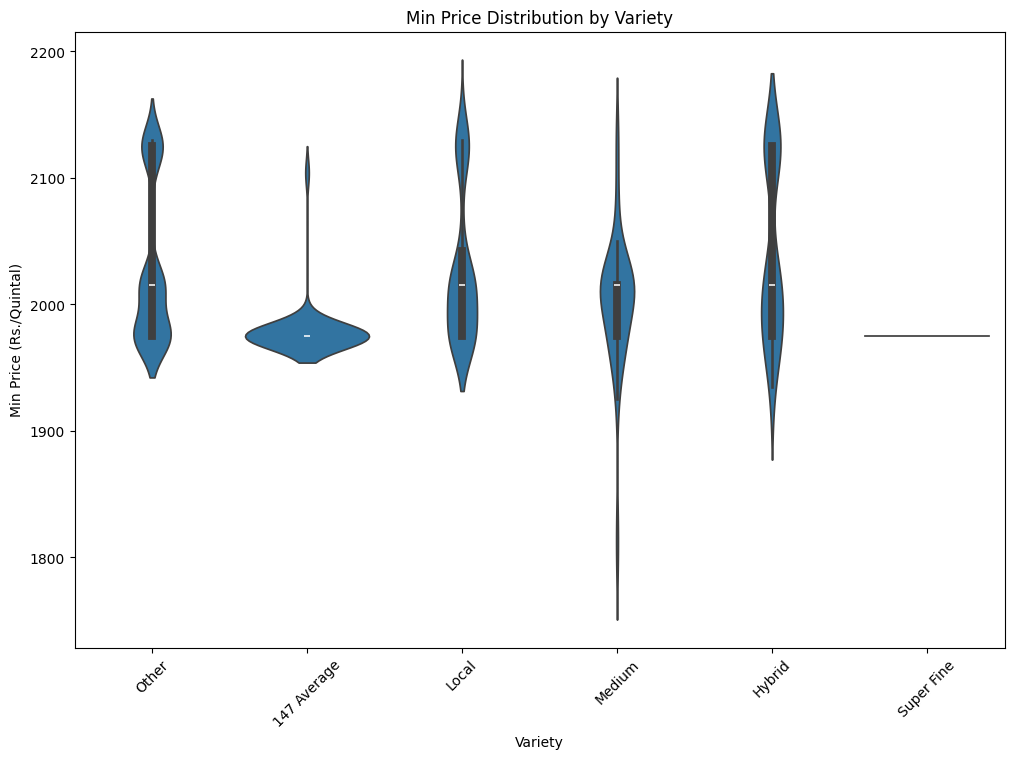

In [58]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Variety', y='Min Price (Rs./Quintal)', data=df)
plt.xticks(rotation=45)
plt.title('Min Price Distribution by Variety')
plt.show()

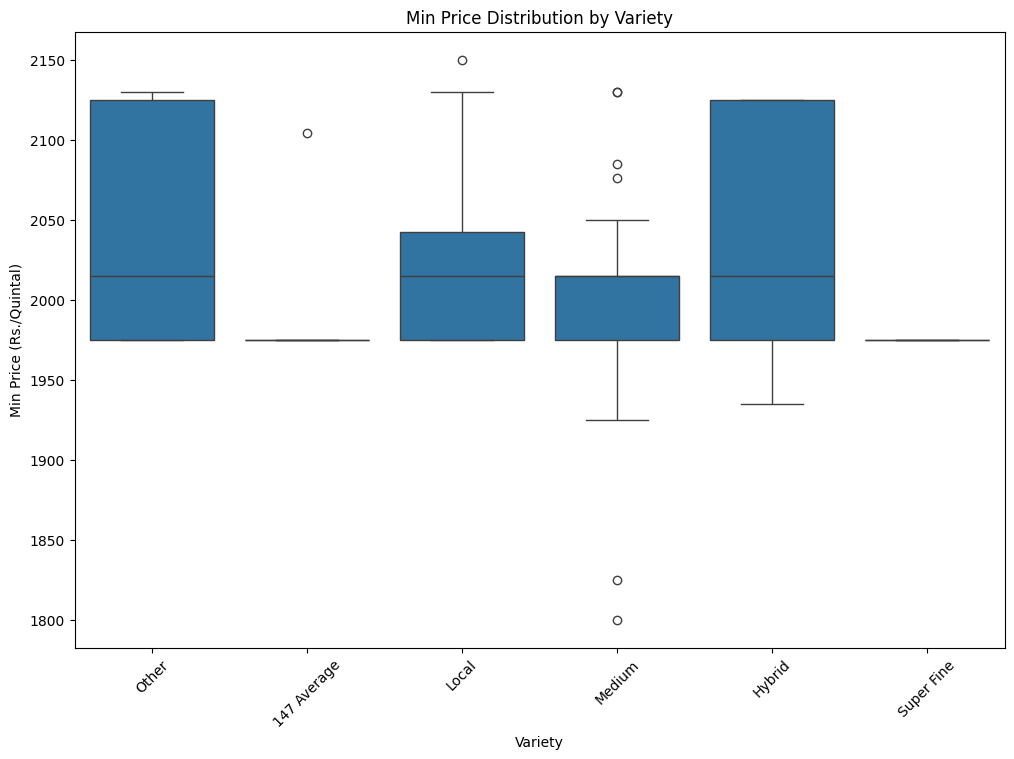

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Variety', y='Min Price (Rs./Quintal)', data=df)
plt.xticks(rotation=45)
plt.title('Min Price Distribution by Variety')
plt.show()